# Learning Pytorch
Pytorch is a machine learning library and will be used in this project to build and train neural networks. It is built on top of the tensor library `torch`, which is a library for high performance numerical computing.

## Aims
- Practice using and troubleshooting pytorch
- Understand the advantages of using pytorch over numpy
- Build a basic machine learning algorithm

## Tensors
- A specialized data structure very similar to numpy arrays
- Similar to numpy arrays but can also run on the GPU as well as the CPU, meaning thousands of operations can be handled simultaneously. Making them a more suitable data structure for training neural networks. 
- **TLDR they are like numpy arrays but with the ability to run on high performance hardware**
### Basic Tensor Examples

In [1]:
import torch
import numpy as np

In [2]:
# From 2d list
data = [[2, 2],[3, 4]]
x_data = torch.tensor(data)

# From numpy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [3]:
# Overides initial x_data with the same shape but random values

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(x_rand)

tensor([[0.5951, 0.7992],
        [0.1187, 0.8262]])


### Loading a dataset
Below is an example of how to load the Fasion-MINST dataset from TorchVision. The dataset contains 60,000 training examples and 10,000 test examples. Each example comprises a 28x28 greyscale image and an associated label

In [4]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [5]:
training_data = datasets.FashionMNIST(
    root="data", # where the train test data is stored
    train=True, # specifies training or testing dataset
    download=True, # specifies if its local or on internet
    transform=ToTensor() # specifies the type it is transformed to
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Displaying random items from dataset

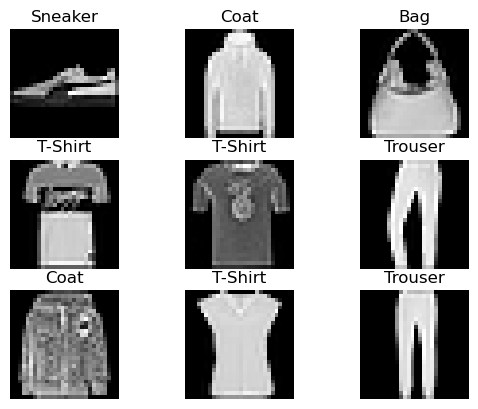

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
} # Labels for each of the clothes in the dataset

fig, axs = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        sample_idx = torch.randint(len(training_data), size=(1,)).item()
        img, label = training_data[sample_idx]
        axs[i][j].imshow(img.squeeze(), cmap="gray")
        axs[i][j].set_title(labels_map[label])
        axs[i][j].axis("off")

## Example: A basic machine learning algorithm with pytorch
Firstly random input and output data is generated. Here $x$ will represent the angle in radians and $y$ will represent the sin of that angle, being predicted. $y^-$ is the prediction of $y$. The loss function is given as: 
$$L = \sum^n_{i=1} (y_i^--y_i)^2$$
Minimizing the loss function means the predicted curve gets closer to the true curve. The loss is minimized by computing the gradient of $L$ with respect to each parameter.
$$\frac{\partial L}{\partial a_{t}} = 2 \sum^n_{i=1} (y_i^- - y_i)$$
$$\frac{\partial L}{\partial b_{t}} = 2 \sum^n_{i=1} (y_i^- - y_i)x_i$$
$$\frac{\partial L}{\partial c_{t}} = 2 \sum^n_{i=1} (y_i^- - y_i)x_i^2$$
$$\frac{\partial L}{\partial d_{t}} = 2 \sum^n_{i=1} (y_i^- - y_i)x_i^3$$
These gradients are then used to update the parameters using gradient descent.
$$a_{t+1} = a_t - \eta \frac{\partial L}{\partial a_t}$$
$$b_{t+1} = b_t - \eta \frac{\partial L}{\partial b_t}$$
$$c_{t+1} = c_t - \eta \frac{\partial L}{\partial c_t}$$
$$d_{t+1} = d_t - \eta \frac{\partial L}{\partial d_t}$$

Where $\eta$ is the learning rate, a hyperparameter that controls how much to change the parameters in response to the computed gradients. *$\eta$ is initially set to be low to visualize the effects of gradient descent*


249 146.64056396484375
499 66.8430404663086
749 33.24922180175781
999 19.105188369750977
1249 13.149600982666016
1499 10.641716003417969
1749 9.585589408874512
1999 9.1408052444458


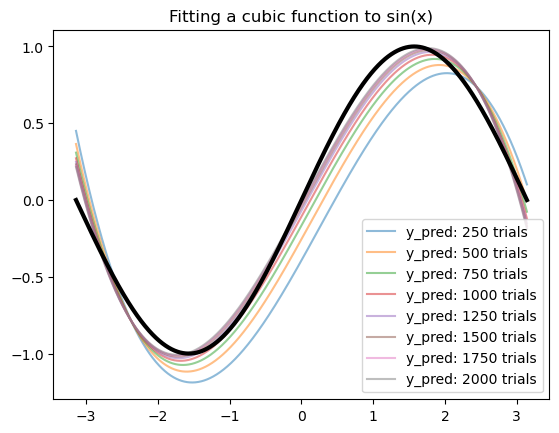

In [7]:
dtype = torch.float
device = torch.device("cpu")

# Generate random input and output data
x = torch.linspace(-np.pi, np.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialise weights for polynomial
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

# colours for the graph

fig, ax = plt.subplots()

learning_rate = 1e-6
for t in range(2000):
    # predict y
    y_pred = a + b*x + c*x**2 + d*x**3
    
    # compute loss
    loss = (y_pred - y).pow(2).sum().item()
    
    # compute gradients with respect to a, b, c, d
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x**2).sum()
    grad_d = (grad_y_pred * x**3).sum()
    
    # update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    
    if t % 250 == 249:
        print(t, loss)
        ax.set_title("Fitting a cubic function to sin(x)")
        ax.plot(x.cpu(), y_pred.detach().cpu(), label=f"y_pred: {t+1} trials", alpha = 0.5)
        ax.legend()

ax.plot(x.cpu(), y.cpu(), label="y=sin(x)", color="black", linewidth=3)